<a href="https://colab.research.google.com/github/opethaiwoh/Workshop/blob/main/QUS1_608_Final_Project_Opeyemi_Adeniran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### For every image in the dataset,  resize it to 64×64 pixels. 

In [ ]:
import glob
import cv2
import numpy as np
x = []
y = []

for folder in glob.glob(f'{"/content/drive/MyDrive/FINAL PROJECT/COSC 680_FINAL PROJECT/animals"}/*'):
  image_cat = folder[68:]
  for file in glob.glob(f'{folder}/*'):
    animal = cv2.imread(file)
    animal = cv2.resize(animal, (64,64), interpolation=cv2.INTER_AREA)
    x.append(animal)
    y.append(image_cat)

x=np.array(x)
y=np.array(y)


### a) Implement a CNN architecture (model) that contains only a few layers — the entire network architecture can be summarized as:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

### b) Perform your training (80%) and testing split (20%), along with one-hot encoding the labels. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


enc = LabelEncoder()

y_tranformed = enc.fit_transform(y)

y_oh = to_categorical(y_tranformed)

(x_train, x_test, y_train, y_test) = train_test_split(x, y_oh, train_size=0.8)

In [ ]:
x_test = x_test/255
x_train = x_train/255

In [ ]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

### c) Compile the model by  initialize  with ‘SGD’ optimizer and using a learning rate of  0.005 and cross-entropy as the loss function.

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.005)

model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy']) 

### d) Train the network for 50  epochs (you may use mini-batch sizes of 32 (meaning that 32 images will be presented to the network at a time, and a full forward and backward pass will be done to update the parameters of the network). 

In [ ]:
new_animal = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
75/75 [==============================] - 49s 650ms/step - loss: 1.0015 - accuracy: 0.4938 - val_loss: 0.9543 - val_accuracy: 0.4917
Epoch 2/50
75/75 [==============================] - 49s 659ms/step - loss: 0.9142 - accuracy: 0.5254 - val_loss: 0.9183 - val_accuracy: 0.5467
Epoch 3/50
75/75 [==============================] - 51s 674ms/step - loss: 0.8768 - accuracy: 0.5525 - val_loss: 0.8915 - val_accuracy: 0.5667
Epoch 4/50
75/75 [==============================] - 50s 668ms/step - loss: 0.8561 - accuracy: 0.5700 - val_loss: 0.9003 - val_accuracy: 0.5667
Epoch 5/50
75/75 [==============================] - 50s 668ms/step - loss: 0.8399 - accuracy: 0.5929 - val_loss: 0.8854 - val_accuracy: 0.5567
Epoch 6/50
75/75 [==============================] - 55s 740ms/step - loss: 0.8268 - accuracy: 0.5725 - val_loss: 0.8515 - val_accuracy: 0.5733
Epoch 7/50
75/75 [==============================] - 51s 674ms/step - loss: 0.8060 - accuracy: 0.6075 - val_loss: 0.8804 - val_accuracy: 0.5183

### e) Serialize the network weights and optimizer state to disk (e.g., save the model  as  hdf5  format) 

In [ ]:
model.save('/content/drive/MyDrive/FINAL PROJECT/COSC 680_FINAL PROJECT/new_animals/new_animals.h5')

In [ ]:
# list all data in history
print(new_animal.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### f) Plot the accuracy and loss over time for both the training and testing data.

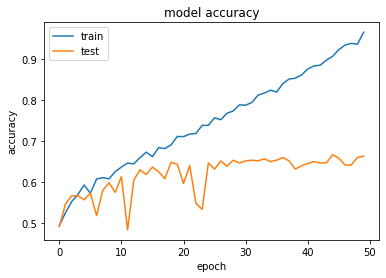

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(new_animal.history['accuracy'])
plt.plot(new_animal.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

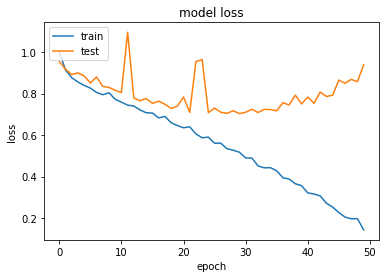

In [ ]:
# summarize history for loss
plt.plot(new_animal.history['loss'])
plt.plot(new_animal.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/FINAL PROJECT/COSC 680_FINAL PROJECT/new_animals/new_animals.h5')

In [ ]:
model.evaluate(x_test,y_test,batch_size=32)

19/19 [==============================] - 4s 195ms/step - loss: 0.9390 - accuracy: 0.6633


[0.9389747977256775, 0.6633333563804626]

### g) Load the trained network (model) from disk  and classify images in the test set. Evaluate its performance as classification accuracy using classification_report  of sklearn.metrics library

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
#predict
y_test = np.argmax(y_test, axis=1)

y_predicted = model.predict(x_test)
y_predicted = np.argmax(y_predicted, axis=1)

print(classification_report(y_predicted, y_test))

19/19 [==============================] - 5s 243ms/step
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       180
           1       0.52      0.60      0.56       180
           2       0.90      0.76      0.82       240

    accuracy                           0.66       600
   macro avg       0.66      0.65      0.65       600
weighted avg       0.69      0.66      0.67       600



### h) Compute the confusion matrix to evaluate the accuracy of a classification using sklearn.metrics.confusion_matrix.


In [ ]:
#get confusion matrix
print(confusion_matrix(y_predicted,y_test))

[[108  65   7]
 [ 59 108  13]
 [ 25  33 182]]
